# Kirsch and Sobel Operators

# Introduction
The Kirsch and Sobel Operators and edge detection operators like the Laplacian of the Gaussian.
We will be implementing both operators to detect edges. Bwelow you will see the matrix for these two operators

# Method
We will just be passing these edge detection operators and see what the outcomes are and well they compare woth the Laplacian of the Gaussian

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
from IPython.display import display, Math, Latex
from PIL import Image, ImageFilter
import os, os.path
import glob
from copy import deepcopy, copy

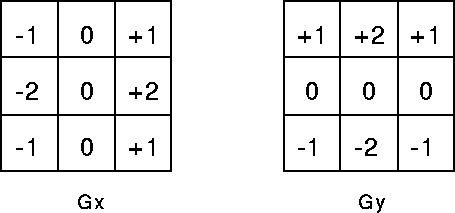

In [2]:
sobel = Image.open('imagesHW9/sobel.gif')
display(sobel)

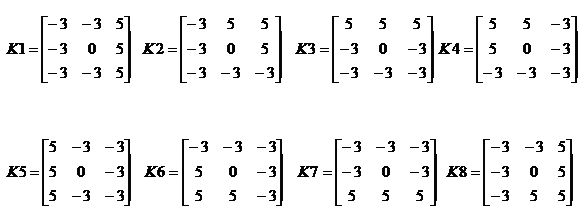

In [3]:
kirsch = Image.open('imagesHW9/kirsch.png')
display(kirsch)

In [4]:
sobel_horizontal = [[-1,-2,-1],[0,0,0],[1,2,1]]
sobel_vertical = [[-1,0,1],[-2,0,2],[-1,0,1]]

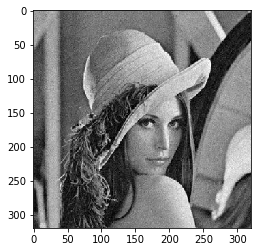

In [5]:
img = plt.imread("ImagesHW8/image1.jpg")
plt.imshow(img,cmap='gray')

In [6]:
hz = convolve2d(img,sobel_horizontal)

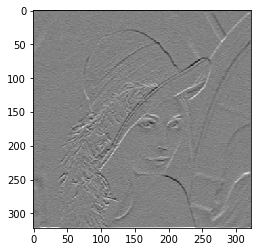

In [7]:
plt.imshow(hz,cmap='gray')

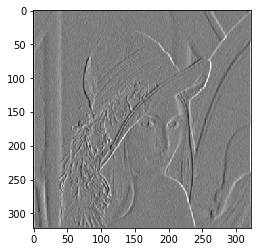

In [8]:
vert = convolve2d(img,sobel_vertical)
plt.imshow(vert,cmap='gray')

In [9]:
end = np.sqrt(hz**2 + vert**2)

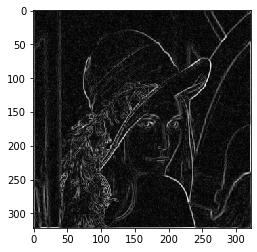

In [10]:
plt.imshow(end,cmap='gray')

In [11]:
def thresholding(img,threshold= 100):
    k = np.zeros_like(img)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j] < threshold):
                k[i][j] = 0
            else:
                k[i][j] = 255
    return np.array(k)

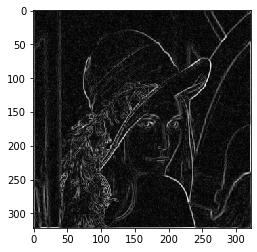

In [12]:
plt.imshow(end,cmap='gray')

In [13]:
#Kirsch kernels
K_0 = [[5,5,5],[-3,0,-3],[-3,-3,-3]]
K_1 = [[-3,5,5],[-3,0,5],[-3,-3,-3]]
K_2 = [[-3,-3,5],[-3,0,5],[-3,-3,5]]
K_3 = [[-3,-3,-3],[-3,0,5],[-3,5,5]]
K_4 = [[-3,-3,-3],[-3,0,-3],[5,5,5]]
K_5 = [[-3,-3,-3],[5,0,-3],[5,5,-3]]
K_6 = [[5,-3,-3],[5,0,-3],[5,-3,-3]]
K_7 = [[5,5,-3],[5,0,-3],[-3,-3,-3]]

In [14]:
filt0 = abs(convolve2d(img,K_0))
filt1 = abs(convolve2d(img,K_1))
filt2 = abs(convolve2d(img,K_2))
filt3 = abs(convolve2d(img,K_3))
filt4 = abs(convolve2d(img,K_4))
filt5 = abs(convolve2d(img,K_5))
filt6 = abs(convolve2d(img,K_6))
filt7 = abs(convolve2d(img,K_7))

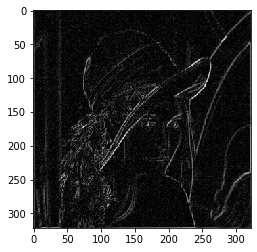

In [15]:
plt.imshow(filt3,cmap='gray')

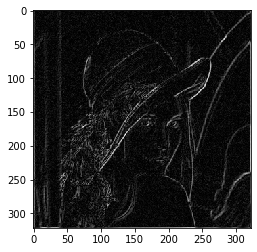

In [16]:
plt.imshow(filt7,cmap='gray')

In [17]:
ret = np.maximum.reduce([filt0,filt1,filt2,filt3,filt4,filt5,filt6,filt7])

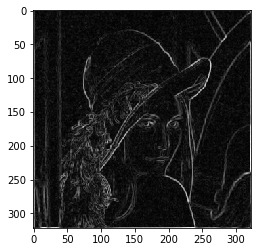

In [18]:
plt.imshow(ret,cmap='gray')

In [19]:
def show(o_img,th_1,th_2,th_3,th_4,th_5):    
    fig = plt.figure()
    fig.set_figheight(15)
    fig.set_figwidth(15)

    fig.add_subplot(2,3,1)
    plt.imshow(o_img, cmap='gray')
    plt.title("Original")
    # display the new image
    fig.add_subplot(2,3,2)
    plt.imshow(th_1, cmap='gray')
    plt.title("Threshold = 50")
    
    fig.add_subplot(2,3,3)
    plt.imshow(th_2, cmap='gray')
    plt.title("Threshold = 75")
    
    fig.add_subplot(2,3,4)
    plt.imshow(th_3, cmap='gray')
    plt.title("Threshold = 100")
    
    fig.add_subplot(2,3,5)
    plt.imshow(th_4, cmap='gray')
    plt.title("Threshold = 125")
    
    fig.add_subplot(2,3,6)
    plt.imshow(th_5, cmap='gray')
    plt.title("Threshold = 150")

    plt.show(block=True)

In [20]:
def sobel(img_1):
    hz = convolve2d(img_1,sobel_horizontal,mode='same')
    vert = convolve2d(img_1,sobel_vertical,mode='same')
    res = np.sqrt(hz**2 + vert**2)
    th_1 = thresholding(res,50)
    th_2 = thresholding(res,75)
    th_3 = thresholding(res,100)
    th_4 = thresholding(res,125)
    th_5 = thresholding(res,150)
    show(img_1,th_1,th_2,th_3,th_4,th_5)

In [21]:
def kirsch(img_1):
    K_0 = [[5,5,5],[-3,0,-3],[-3,-3,-3]]
    K_1 = [[-3,5,5],[-3,0,5],[-3,-3,-3]]
    K_2 = [[-3,-3,5],[-3,0,5],[-3,-3,5]]
    K_3 = [[-3,-3,-3],[-3,0,5],[-3,5,5]]
    K_4 = [[-3,-3,-3],[-3,0,-3],[5,5,5]]
    K_5 = [[-3,-3,-3],[5,0,-3],[5,5,-3]]
    K_6 = [[5,-3,-3],[5,0,-3],[5,-3,-3]]
    K_7 = [[5,5,-3],[5,0,-3],[-3,-3,-3]]

    filt0 = abs(convolve2d(img_1,K_0,mode='same'))
    filt1 = abs(convolve2d(img_1,K_1,mode='same'))
    filt2 = abs(convolve2d(img_1,K_2,mode='same'))
    filt3 = abs(convolve2d(img_1,K_3,mode='same'))
    filt4 = abs(convolve2d(img_1,K_4,mode='same'))
    filt5 = abs(convolve2d(img_1,K_5,mode='same'))
    filt6 = abs(convolve2d(img_1,K_6,mode='same'))
    filt7 = abs(convolve2d(img_1,K_7,mode='same'))
    
    res = filt5
    
    th_1 = thresholding(res,50)
    th_2 = thresholding(res,75)
    th_3 = thresholding(res,100)
    th_4 = thresholding(res,125)
    th_5 = thresholding(res,150)
    show(img_1,th_1,th_2,th_3,th_4,th_5)

In [22]:
ima = []
for filename in glob.glob('imagesHW2/512x512/*.jpg'): #assuming gif
    img = plt.imread(filename)
    ima.append(img)

# Results:
Here we have both Sobel and Kirsch operators with a threshold of 50, 75, 100, 125,150

## Sobel

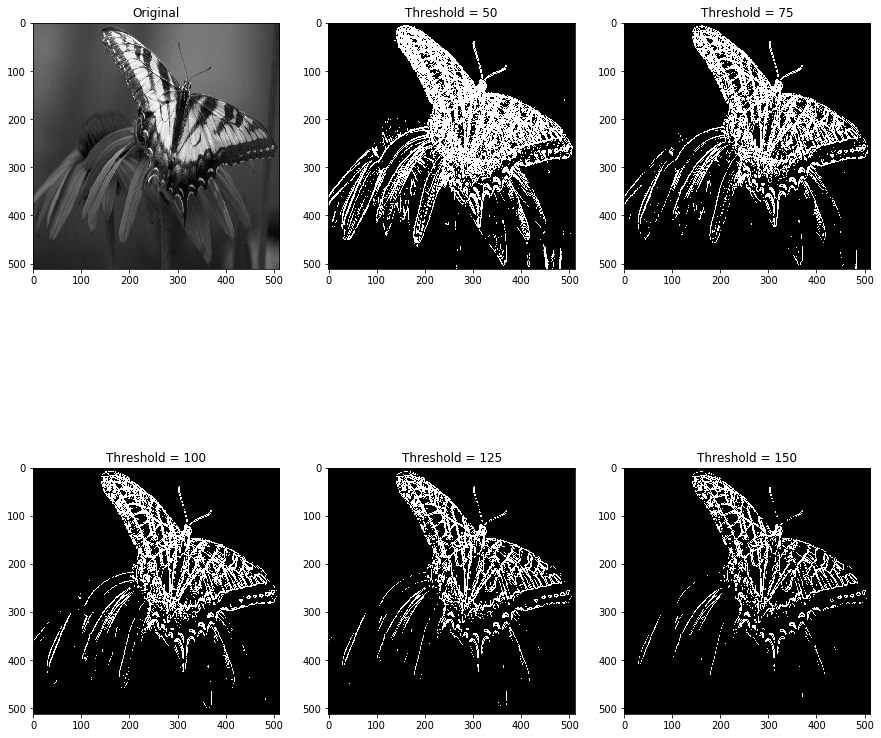

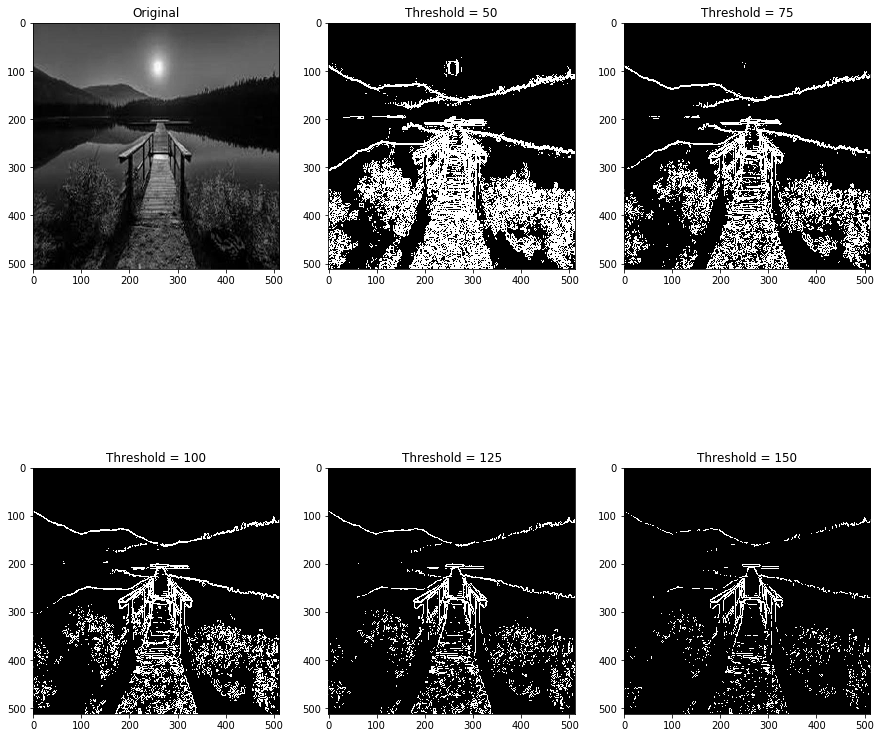

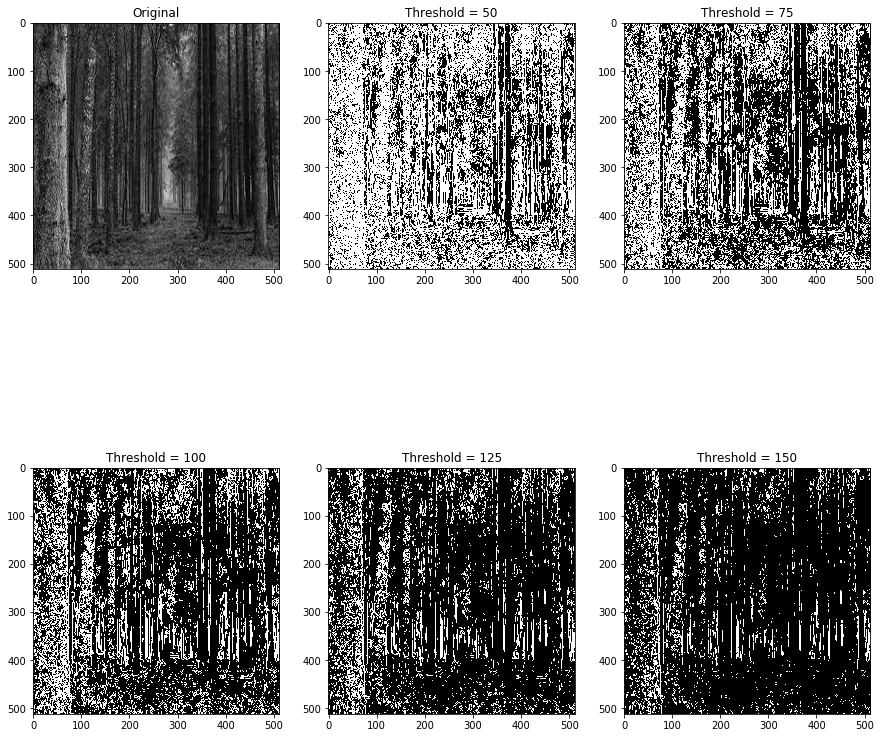

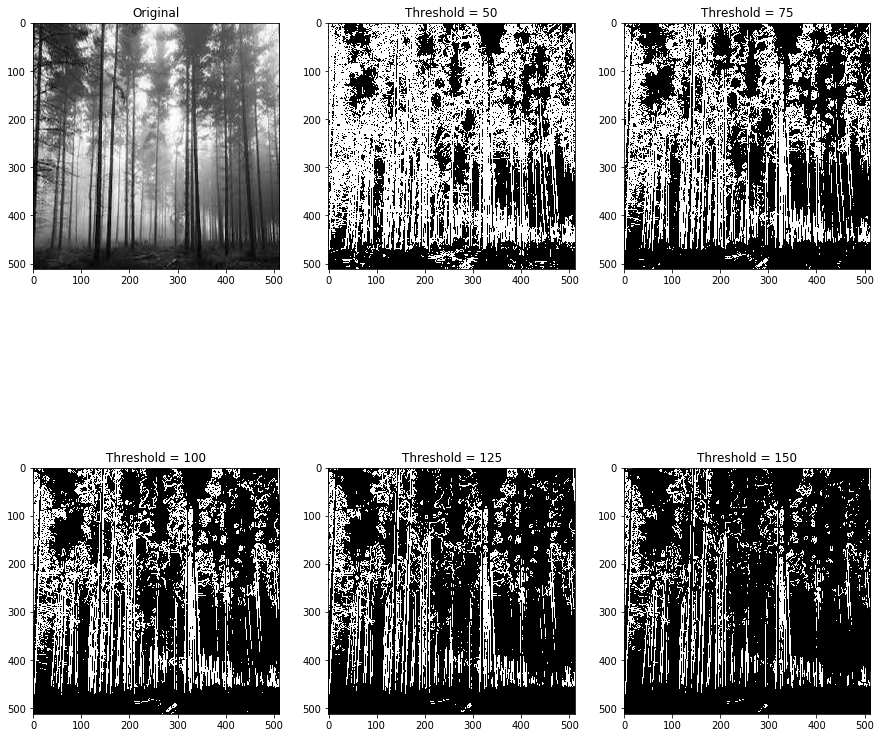

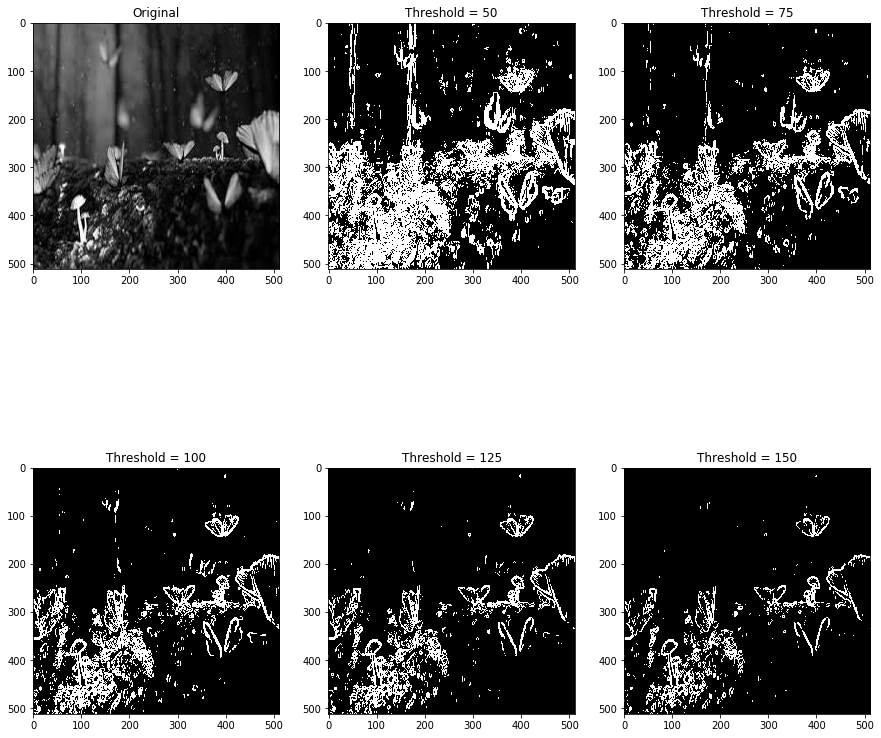

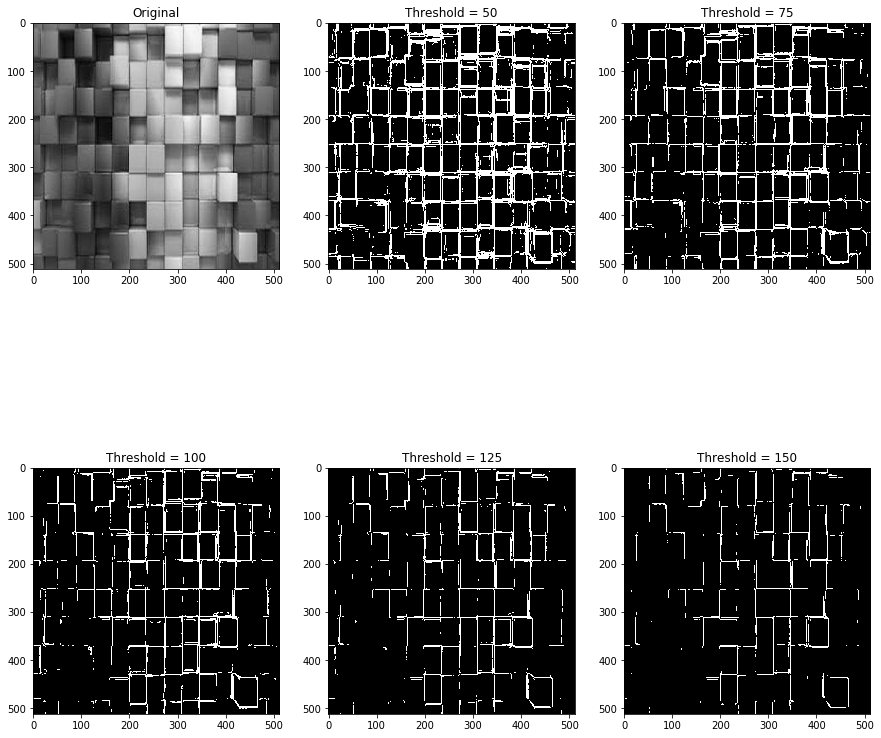

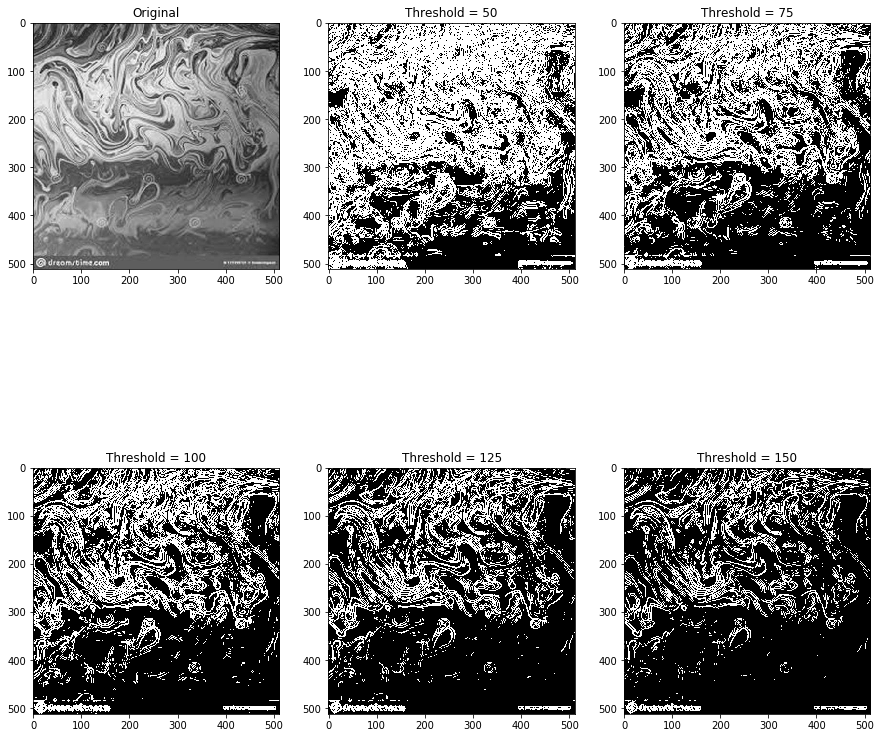

In [23]:
for i in range(len(ima)):
    sobel(ima[i])

## Kirsch

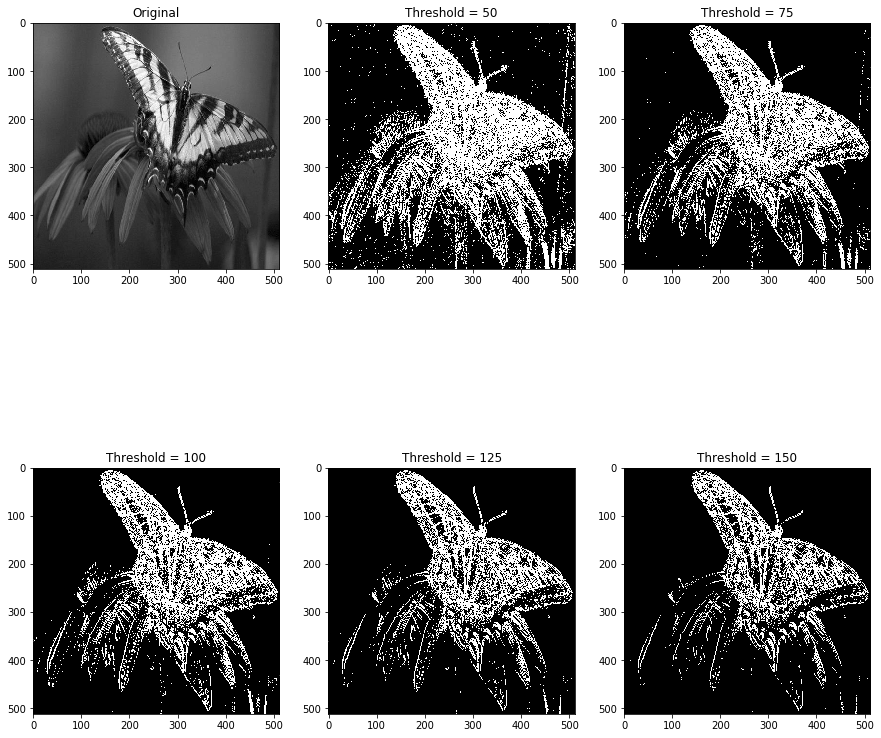

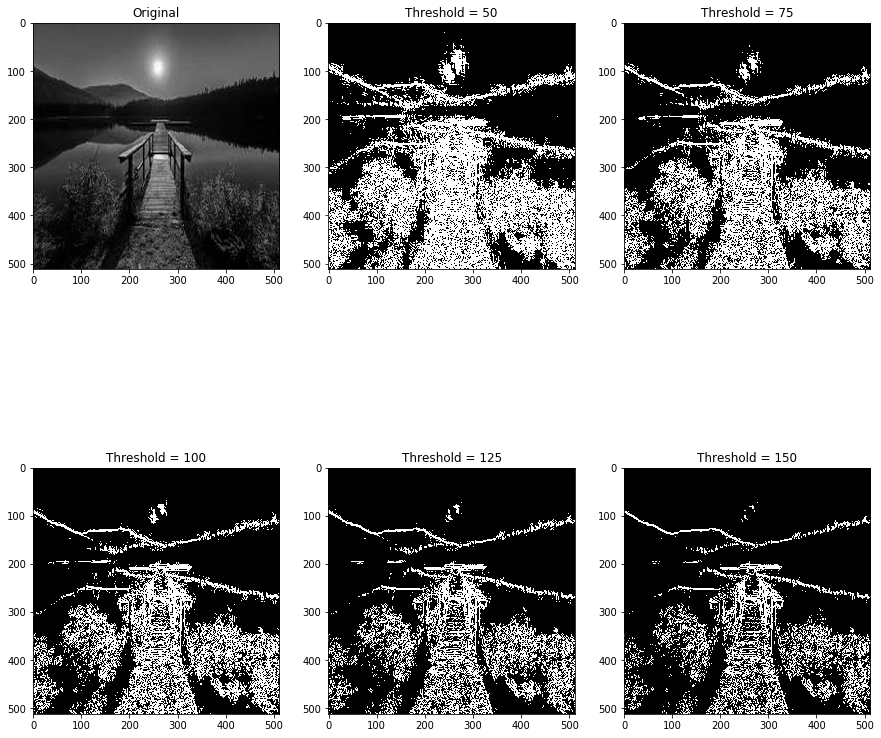

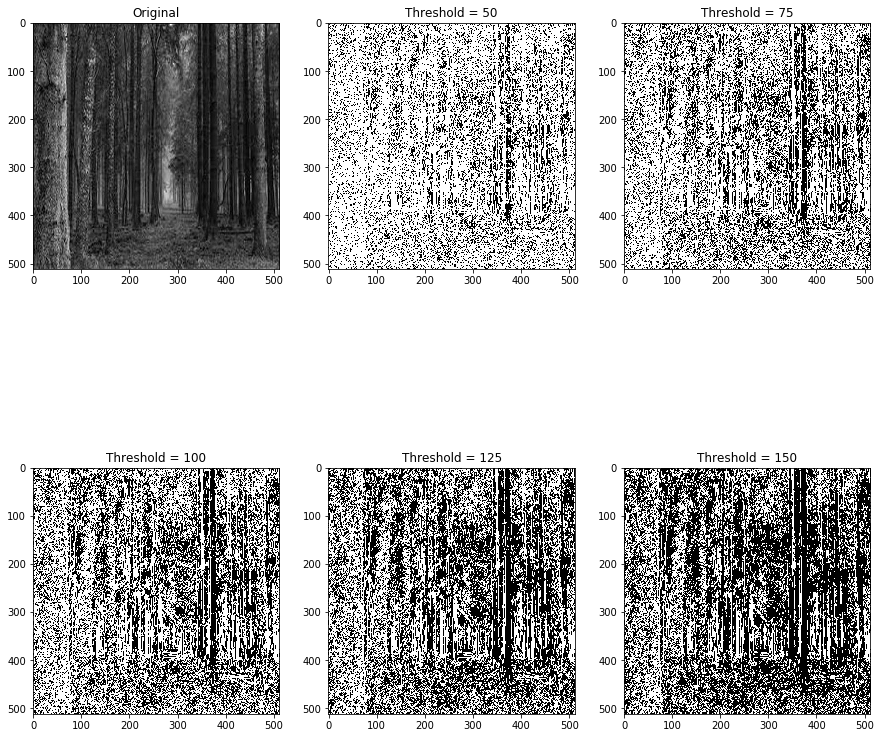

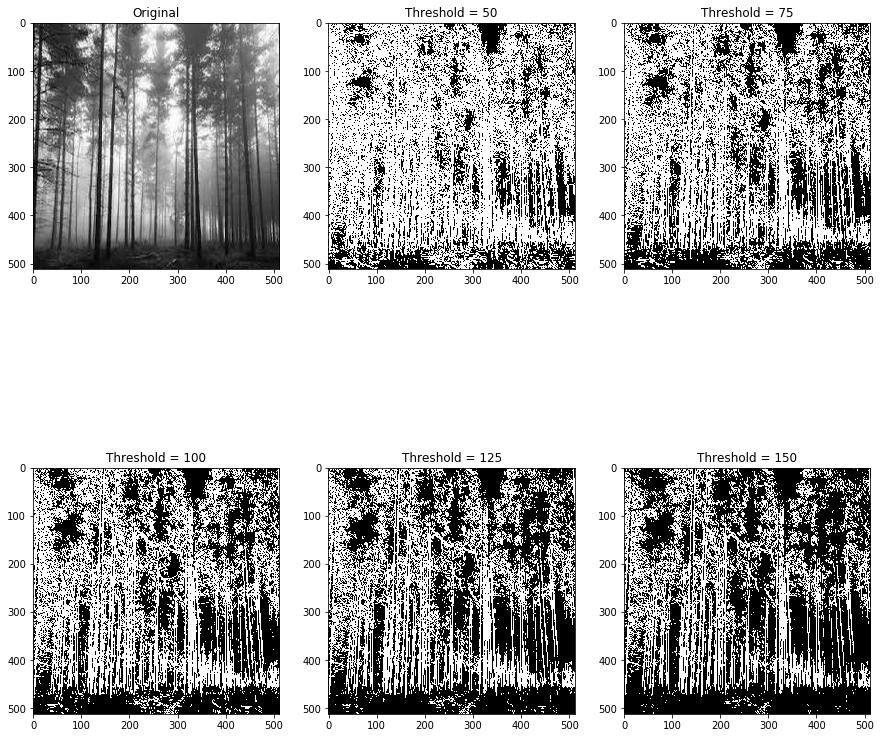

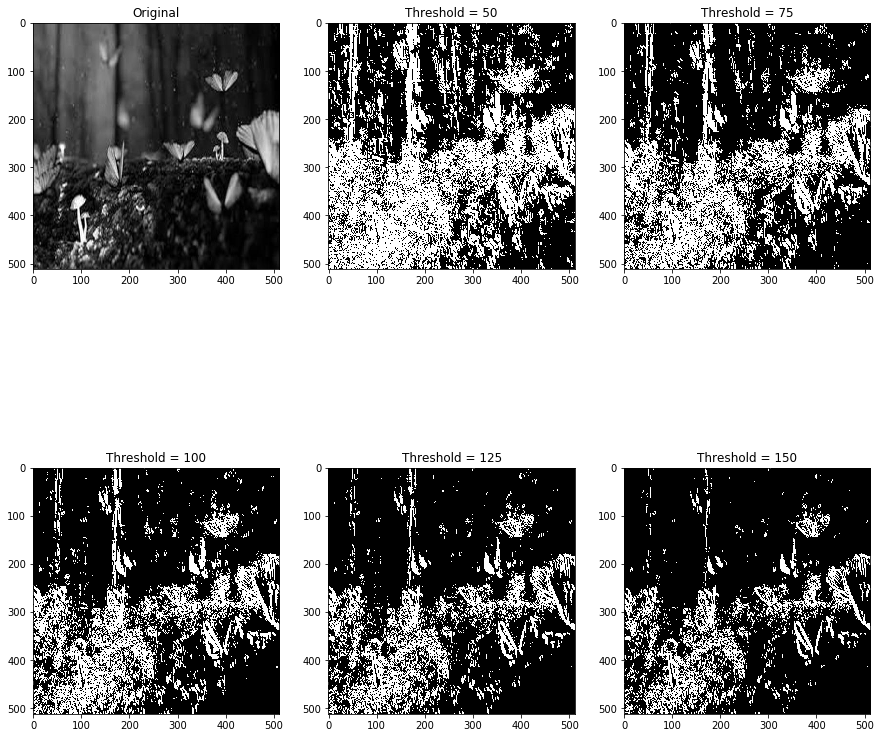

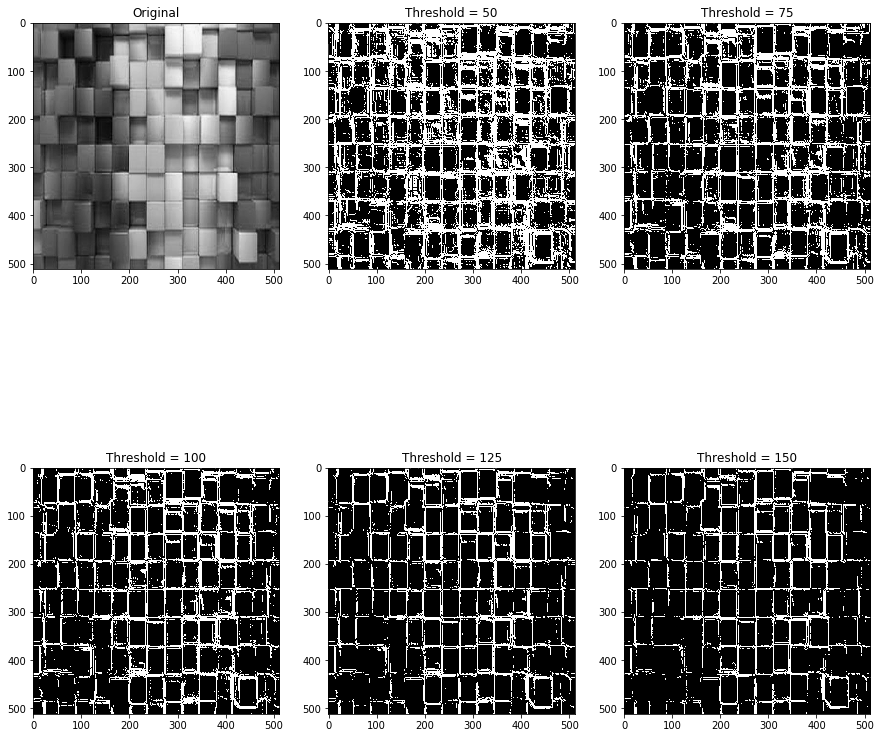

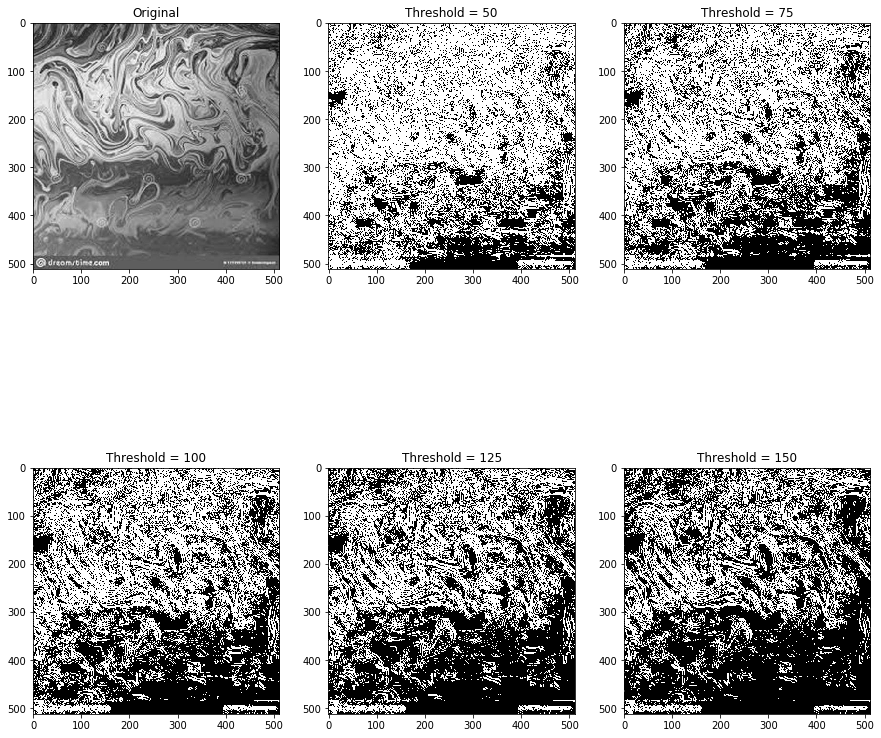

In [24]:
for i in range(len(ima)):
    kirsch(ima[i])

# Conclusion
Kirsch and Sobel operators does very well as edge detectors but you have to adjust the threshold in most case. But both operators are different like the image with the butterflies, Sobel you can see that you can sort of make out the butterflies but for kirsch it is harder to distinguish
